# Optimal Path
“To find the optimal path from the starting point (source), covering all the sub-destinations”.

The problem statements aim at determining the closest sub-destination from the current position, the starting point being the user’s current location.

# Importing Libraries

In [29]:
#importing necessary libraries
import pandas as pd
import numpy as np
import geopy
import geopandas
from geopy import Nominatim
import folium

# Loading the dataset with the address

In [30]:
#load the dataset
df = pd.read_csv('addresses-Canada.csv')
df.head()

,Category,Number,Name,Address 1,City,Province,Country,Postal Code,Telefon,color,shape
0,G,NaN,FreshCo Simcoe & Byng,1150 Simcoe Street North,Oshawa,ON,Canada,L1G 4W7,905-576-9562,blue,shopping-cart
1,G,NaN,FreshCo Simcoe & Winchester,2650 Simcoe Street North,Oshawa,ON,Canada,L1L 0R1,905-436-9851,blue,shopping-cart
2,G,173,"Giant Tiger, Oshawa",250 Taunton Road East,Oshawa,ON,Canada,L1G 7T1,905-438-8433,blue,shopping-cart
3,G,NaN,Sobeys Oshawa,1377 Wilson Road North,Oshawa,ON,Canada,�L1K 2Z5,905-440-4687,blue,shopping-cart
4,G,NaN,LIZ'S NOFRILLS OSHAWA,1050 SIMCOE ST N,Oshawa,ON,Canada,L1G 4W5,866-987-6453,blue,shopping-cart


In [31]:
#merging the features of the address
df['ADDRESS']=df['Address 1']+","+df['City']+","+df['City']+","+df['Province']+","+df['Country']
df.head()

,Category,Number,Name,Address 1,City,Province,Country,Postal Code,Telefon,color,shape,ADDRESS
0,G,NaN,FreshCo Simcoe & Byng,1150 Simcoe Street North,Oshawa,ON,Canada,L1G 4W7,905-576-9562,blue,shopping-cart,"1150 Simcoe Street North,Oshawa,Oshawa,ON,Canada"
1,G,NaN,FreshCo Simcoe & Winchester,2650 Simcoe Street North,Oshawa,ON,Canada,L1L 0R1,905-436-9851,blue,shopping-cart,"2650 Simcoe Street North,Oshawa,Oshawa,ON,Canada"
2,G,173,"Giant Tiger, Oshawa",250 Taunton Road East,Oshawa,ON,Canada,L1G 7T1,905-438-8433,blue,shopping-cart,"250 Taunton Road East,Oshawa,Oshawa,ON,Canada"
3,G,NaN,Sobeys Oshawa,1377 Wilson Road North,Oshawa,ON,Canada,�L1K 2Z5,905-440-4687,blue,shopping-cart,"1377 Wilson Road North,Oshawa,Oshawa,ON,Canada"
4,G,NaN,LIZ'S NOFRILLS OSHAWA,1050 SIMCOE ST N,Oshawa,ON,Canada,L1G 4W5,866-987-6453,blue,shopping-cart,"1050 SIMCOE ST N,Oshawa,Oshawa,ON,Canada"


# Feature Engineering
Adding the latitude and longitude column by fetching the address of the particular stores.

In [32]:
#Converting address to latitude and longitude
from geopy.extra.rate_limiter import RateLimiter
locator = Nominatim(user_agent='nandinimalhotra04@gmail.com')
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
df['location'] = df['ADDRESS'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)

In [33]:
df.head()

,Category,Number,Name,Address 1,City,Province,Country,Postal Code,Telefon,color,shape,ADDRESS,location,point,latitude,longitude,altitude
0,G,NaN,FreshCo Simcoe & Byng,1150 Simcoe Street North,Oshawa,ON,Canada,L1G 4W7,905-576-9562,blue,shopping-cart,"1150 Simcoe Street North,Oshawa,Oshawa,ON,Canada","(1150, Simcoe Street North, Oshawa, Durham Reg...","(43.928184, -78.87709, 0.0)",43.928184,-78.877090,0.0
1,G,NaN,FreshCo Simcoe & Winchester,2650 Simcoe Street North,Oshawa,ON,Canada,L1L 0R1,905-436-9851,blue,shopping-cart,"2650 Simcoe Street North,Oshawa,Oshawa,ON,Canada","(2650, Simcoe Street North, Windfields Farm, O...","(43.964546672266835, -78.90362907154712, 0.0)",43.964547,-78.903629,0.0
2,G,173,"Giant Tiger, Oshawa",250 Taunton Road East,Oshawa,ON,Canada,L1G 7T1,905-438-8433,blue,shopping-cart,"250 Taunton Road East,Oshawa,Oshawa,ON,Canada","(Harvey's, 250, Taunton Road East, Oshawa, Dur...","(43.935313199999996, -78.86992985900031, 0.0)",43.935313,-78.869930,0.0
3,G,NaN,Sobeys Oshawa,1377 Wilson Road North,Oshawa,ON,Canada,�L1K 2Z5,905-440-4687,blue,shopping-cart,"1377 Wilson Road North,Oshawa,Oshawa,ON,Canada","(1377, Wilson Road North, Oshawa, Durham Regio...","(43.939167605555554, -78.85987089444444, 0.0)",43.939168,-78.859871,0.0
4,G,NaN,LIZ'S NOFRILLS OSHAWA,1050 SIMCOE ST N,Oshawa,ON,Canada,L1G 4W5,866-987-6453,blue,shopping-cart,"1050 SIMCOE ST N,Oshawa,Oshawa,ON,Canada","(Curves, 1050, Simcoe Street North, Oshawa, Du...","(43.9245026, -78.8760845, 0.0)",43.924503,-78.876085,0.0


# Exploratory Data Analysis

In [34]:
#Dropping irrelevant features
df = df.drop(['Address 1', 'City', 'Province', 'Country','Postal Code','Telefon', 'ADDRESS', 'location', 'point','Number','altitude'], axis=1)
df.head(40)

,Category,Name,color,shape,latitude,longitude
0,G,FreshCo Simcoe & Byng,blue,shopping-cart,43.928184,-78.877090
1,G,FreshCo Simcoe & Winchester,blue,shopping-cart,43.964547,-78.903629
2,G,"Giant Tiger, Oshawa",blue,shopping-cart,43.935313,-78.869930
3,G,Sobeys Oshawa,blue,shopping-cart,43.939168,-78.859871
4,G,LIZ'S NOFRILLS OSHAWA,blue,shopping-cart,43.924503,-78.876085
5,G,Metro Taunton & Ritson,blue,shopping-cart,43.932998,-78.868089
6,G,Oshawa North Supercentre,blue,shopping-cart,43.944471,-78.848846
7,G,Food Basics,blue,shopping-cart,43.919681,-78.850911
8,G,NADIM'S NOFRILLS OSHAWA,blue,shopping-cart,43.903951,-78.858549
9,G,Oshawa Supercentre,blue,shopping-cart,43.881164,-78.881831


In [35]:
# Dropping missing values
df.dropna(subset = ["latitude","longitude"], inplace=True)

In [36]:
df.head(40)

,Category,Name,color,shape,latitude,longitude
0,G,FreshCo Simcoe & Byng,blue,shopping-cart,43.928184,-78.877090
1,G,FreshCo Simcoe & Winchester,blue,shopping-cart,43.964547,-78.903629
2,G,"Giant Tiger, Oshawa",blue,shopping-cart,43.935313,-78.869930
3,G,Sobeys Oshawa,blue,shopping-cart,43.939168,-78.859871
4,G,LIZ'S NOFRILLS OSHAWA,blue,shopping-cart,43.924503,-78.876085
5,G,Metro Taunton & Ritson,blue,shopping-cart,43.932998,-78.868089
6,G,Oshawa North Supercentre,blue,shopping-cart,43.944471,-78.848846
7,G,Food Basics,blue,shopping-cart,43.919681,-78.850911
8,G,NADIM'S NOFRILLS OSHAWA,blue,shopping-cart,43.903951,-78.858549
9,G,Oshawa Supercentre,blue,shopping-cart,43.881164,-78.881831


# Asking for user's address

In [37]:
#Getting user input
user_add1=input("Enter your street number:")
user_add2=input("Enter your street name:")
user_add3=input("Enter your City:")
user_add4=input("Enter your province:")
user_ADD=str(user_add1)+" "+str(user_add2)+","+str(user_add3)+","+str(user_add4)+", Canada"
user_ADD


Enter your street number:56
Enter your street name:Norland Circle
Enter your City:Oshawa
Enter your province:Ontario


'56 Norland Circle,Oshawa,Ontario, Canada'

In [38]:
#The places user want to visit
places_to_visit=[]
ans='y'
while(ans!='n'):
    x=input("Where do you want to visit(Groceries(G)/Electronics(E)/Food(F)/Clothing(C)/Others(O)):")
    places_to_visit.append(x)
    ans=input("Do you want to visit anywhere else?(yes(y)/no(n)):")

Where do you want to visit(Groceries(G)/Electronics(E)/Food(F)/Clothing(C)/Others(O)):G
Do you want to visit anywhere else?(yes(y)/no(n)):y
Where do you want to visit(Groceries(G)/Electronics(E)/Food(F)/Clothing(C)/Others(O)):E
Do you want to visit anywhere else?(yes(y)/no(n)):y
Where do you want to visit(Groceries(G)/Electronics(E)/Food(F)/Clothing(C)/Others(O)):O
Do you want to visit anywhere else?(yes(y)/no(n)):n


In [39]:
#creating list of places user want to visit
places_to_visit

['G', 'E', 'O']

# Saving user's lattitude and longitude

In [40]:
#Calculating user latitude and longitude
user_locator = Nominatim(user_agent='nandinimalhotra04@gmail.com')
user_location = user_locator.geocode(user_ADD)
print('User Latitude = {}, User Longitude = {}'.format(user_location.latitude, user_location.longitude))

User Latitude = 43.94987915, User Longitude = -78.89279710771785


In [41]:
#Storing the user latitude and longitude in the variables
user_latitude=user_location[-1][0]
user_longitude=user_location[-1][1]

# Knowing the user's destinations 

In [42]:
#Filtering the dataset so as to keep just the categories that are to be visited
df_narrowed=df[df['Category'].isin(places_to_visit)].reset_index(drop=True)
df_narrowed

,Category,Name,color,shape,latitude,longitude
0,G,FreshCo Simcoe & Byng,blue,shopping-cart,43.928184,-78.877090
1,G,FreshCo Simcoe & Winchester,blue,shopping-cart,43.964547,-78.903629
2,G,"Giant Tiger, Oshawa",blue,shopping-cart,43.935313,-78.869930
3,G,Sobeys Oshawa,blue,shopping-cart,43.939168,-78.859871
4,G,LIZ'S NOFRILLS OSHAWA,blue,shopping-cart,43.924503,-78.876085
5,G,Metro Taunton & Ritson,blue,shopping-cart,43.932998,-78.868089
6,G,Oshawa North Supercentre,blue,shopping-cart,43.944471,-78.848846
7,G,Food Basics,blue,shopping-cart,43.919681,-78.850911
8,G,NADIM'S NOFRILLS OSHAWA,blue,shopping-cart,43.903951,-78.858549
9,G,Oshawa Supercentre,blue,shopping-cart,43.881164,-78.881831


# Shortest path dataset

In [43]:
# Creating a new dataset that will contain the final destination
data=[['User','Home Address',user_latitude,user_longitude,0,'pink','male']]
df_short = pd.DataFrame(data, columns = ['Category','Name','latitude','longitude','Distance(km)','color','shape']) 
df_short

,Category,Name,latitude,longitude,Distance(km),color,shape
0,User,Home Address,43.949879,-78.892797,0,pink,male


# Calculating the distance of all location from user's location and storing it as a column in dataset

In [44]:
#importing necessary libraries
import requests
import json

#AI Agent
for j in range(len(places_to_visit)):
    
    df_narrowed['Distance']=0
    for i in range(len(df_narrowed)):

        # call the OSMR API
        r = requests.get(f"http://router.project-osrm.org/route/v1/car/{df_narrowed.longitude[i]},{df_narrowed.latitude[i]};{df_short.longitude[j]},{df_short.latitude[j]}?overview=false""")
        # then you load the response using the json libray
        # by default you get only one alternative so you access 0-th element of the `routes`
        results = json.loads(r.content)
        legs = results.get("routes").pop(0).get("legs")
        df_narrowed.Distance[i]=legs[0].get("distance")
    df_narrowed['Distance(km)']=df_narrowed['Distance']/1000
    df_narrowed=df_narrowed.sort_values('Distance(km)').reset_index(drop=True)
    # print("Data frame with distance")
    # display(df_narrowed)

    
    #Calculating Haversine Distance
    def haversine_vectorize(lon1, lat1, lon2, lat2):

        lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

        newlon = lon2 - lon1
        newlat = lat2 - lat1

        haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

        dist = 2 * np.arcsin(np.sqrt(haver_formula ))
        km = 6367 * dist #6367 for distance in KM for miles use 3958
        return km

    df_narrowed['Distance(Haversine)']=haversine_vectorize(user_longitude,user_latitude,df_narrowed['longitude'],df_narrowed['latitude'])

    print("Data frame with all the distances")
    display(df_narrowed)

    #Filter the required fields for the nearest store and storing it in the dataste to be appended in df_short
    df_temp=df_narrowed[['Category','Name','latitude','longitude','Distance(km)','color','shape']][0:1]
    category_id=df_temp['Category'][0]
    print(category_id)
    print("Optimal Path Dataset")
    df_short=df_short.append(df_temp).reset_index(drop=True)
    display(df_short)

    
    #Filtering the dataset so as to keep just the categories that are to be visited
    df_narrowed=df_narrowed.drop(df_narrowed[df_narrowed['Category']==category_id].index).reset_index(drop=True)
    if(len(df_narrowed)!=0):
        print("\nFiltered dataset for next destination")
        df_narrowed=df_narrowed.drop(['Distance','Distance(km)','Distance(Haversine)'],axis=1)
        display(df_narrowed)


<ipython-input-44-a06395bcdee8>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Data frame with all the distances


,Category,Name,color,shape,latitude,longitude,Distance,Distance(km),Distance(Haversine)
0,G,FreshCo Simcoe & Winchester,blue,shopping-cart,43.964547,-78.903629,2213,2.213,1.845938
1,G,"Giant Tiger, Oshawa",blue,shopping-cart,43.935313,-78.869930,3644,3.644,2.442910
2,G,FreshCo Simcoe & Byng,blue,shopping-cart,43.928184,-78.877090,3698,3.698,2.718829
3,G,Metro Taunton & Ritson,blue,shopping-cart,43.932998,-78.868089,4074,4.074,2.725366
4,G,LIZ'S NOFRILLS OSHAWA,blue,shopping-cart,43.924503,-78.876085,4165,4.165,3.121023
5,G,Sobeys Oshawa,blue,shopping-cart,43.939168,-78.859871,4185,4.185,2.890902
6,G,Oshawa North Supercentre,blue,shopping-cart,43.944471,-78.848846,5059,5.059,3.567436
7,E,Best Buy�First Pro Oshawa,purple,bolt,43.941558,-78.849613,5272,5.272,3.576727
8,E,The Source,purple,bolt,43.939439,-78.844661,5746,5.746,4.022388
9,G,Food Basics,blue,shopping-cart,43.919681,-78.850911,6695,6.695,4.743097


G
Optimal Path Dataset


,Category,Name,latitude,longitude,Distance(km),color,shape
0,User,Home Address,43.949879,-78.892797,0.000,pink,male
1,G,FreshCo Simcoe & Winchester,43.964547,-78.903629,2.213,blue,shopping-cart



Filtered dataset for next destination


,Category,Name,color,shape,latitude,longitude
0,E,Best Buy�First Pro Oshawa,purple,bolt,43.941558,-78.849613
1,E,The Source,purple,bolt,43.939439,-78.844661
2,O,Oshawa�Warehouse,orange,magnet,43.905203,-78.856215
3,O,THE HOME DEPOT OSHAWA,orange,magnet,43.909387,-78.836302


<ipython-input-44-a06395bcdee8>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Data frame with all the distances


,Category,Name,color,shape,latitude,longitude,Distance,Distance(km),Distance(Haversine)
0,E,Best Buy�First Pro Oshawa,purple,bolt,43.941558,-78.849613,7827,7.827,3.576727
1,E,The Source,purple,bolt,43.939439,-78.844661,8301,8.301,4.022388
2,O,Oshawa�Warehouse,orange,magnet,43.905203,-78.856215,8496,8.496,5.763632
3,O,THE HOME DEPOT OSHAWA,orange,magnet,43.909387,-78.836302,11369,11.369,6.378855


E
Optimal Path Dataset


,Category,Name,latitude,longitude,Distance(km),color,shape
0,User,Home Address,43.949879,-78.892797,0.000,pink,male
1,G,FreshCo Simcoe & Winchester,43.964547,-78.903629,2.213,blue,shopping-cart
2,E,Best Buy�First Pro Oshawa,43.941558,-78.849613,7.827,purple,bolt



Filtered dataset for next destination


,Category,Name,color,shape,latitude,longitude
0,O,Oshawa�Warehouse,orange,magnet,43.905203,-78.856215
1,O,THE HOME DEPOT OSHAWA,orange,magnet,43.909387,-78.836302


<ipython-input-44-a06395bcdee8>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Data frame with all the distances


,Category,Name,color,shape,latitude,longitude,Distance,Distance(km),Distance(Haversine)
0,O,THE HOME DEPOT OSHAWA,orange,magnet,43.909387,-78.836302,3868,3.868,6.378855
1,O,Oshawa�Warehouse,orange,magnet,43.905203,-78.856215,5408,5.408,5.763632


O
Optimal Path Dataset


,Category,Name,latitude,longitude,Distance(km),color,shape
0,User,Home Address,43.949879,-78.892797,0.000,pink,male
1,G,FreshCo Simcoe & Winchester,43.964547,-78.903629,2.213,blue,shopping-cart
2,E,Best Buy�First Pro Oshawa,43.941558,-78.849613,7.827,purple,bolt
3,O,THE HOME DEPOT OSHAWA,43.909387,-78.836302,3.868,orange,magnet


In [45]:
df_short

,Category,Name,latitude,longitude,Distance(km),color,shape
0,User,Home Address,43.949879,-78.892797,0.000,pink,male
1,G,FreshCo Simcoe & Winchester,43.964547,-78.903629,2.213,blue,shopping-cart
2,E,Best Buy�First Pro Oshawa,43.941558,-78.849613,7.827,purple,bolt
3,O,THE HOME DEPOT OSHAWA,43.909387,-78.836302,3.868,orange,magnet


In [46]:
len(df_short)

4

# Generating the locations on the Map

In [134]:
import folium.plugins
map1 = folium.Map(
    location=[43.938315,-78.8689960],
    tiles='cartodbpositron',
    zoom_start=10,
)
marker_cluster = folium.plugins.MarkerCluster().add_to(map1)

locations = df_short[['latitude', 'longitude']]
locationlist = locations.values.tolist()

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup='ID:'+df_short['Category'][point]+' '+df_short['Name'][point], 
    icon=folium.Icon(color=df_short["color"][point], icon_color='white', icon=df_short['shape'][point], angle=0, prefix='fa')).add_to(marker_cluster)
    #folium.Marker(locationlist[point], popup=df_short['Name'][point]).add_to(marker_cluster)
    #print(df_short['shape'][point])
map1
# df_short.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]).add_to(map1), axis=1)
# map1

# Plotting the route between each sub-destination

In [48]:
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np

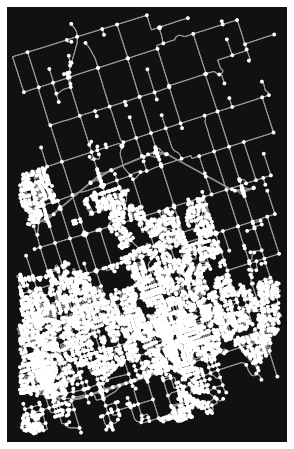

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [49]:
# Defining the map boundaries 
north, east, south, west = 44.047432, -78.787944, 43.832065, -78.958772  
# Downloading the map as a graph object 
G = ox.graph_from_bbox(north, south, east, west, network_type = 'drive')  
# Plotting the map graph 
ox.plot_graph(G)

# Function to plot and define the locations and path in the map

In [131]:
 def plot_path(lat, long, origin_point, destination_point,name_categ_source,name_categ_dest):
    
            """
            Given a list of latitudes and longitudes, origin 
            and destination point, plots a path on a map

            Parameters
            ----------
            lat, long: list of latitudes and longitudes
            origin_point, destination_point: co-ordinates of origin
            and destination    Returns
            -------
            Nothing. Only shows the map.
            """    # adding the lines joining the nodes
            fig = go.Figure(go.Scattermapbox(
                name = "Path",
                mode = "lines",
                lon = long,
                lat = lat,
                marker = {'size': 10},
                line = dict(width = 4.5, color = 'blue')))    # adding source marker
            fig.add_trace(go.Scattermapbox(
                name = "Source: "+name_categ_source[0],
                mode = 'markers',
                textposition='top right',
                textfont=dict(size=16, color='black'),
                text=[name_categ_source[0] + '<br>' + name_categ_source[1]],
                lon = [origin_point[1]],
                lat = [origin_point[0]],
                marker = {'size': 12, 'color':"red"}))

            # adding destination marker
            fig.add_trace(go.Scattermapbox(
                name = "Destination: "+name_categ_dest[0],
                mode = 'markers',
                textposition='top right',
                textfont=dict(size=16, color='black'),
                text=[name_categ_dest[0] + '<br>' + name_categ_dest[1]],
                lon = [destination_point[1]],
                lat = [destination_point[0]],
                marker = {'size': 12, 'color':'green'}))

            # getting center for plots:
            lat_center = np.mean(lat)
            long_center = np.mean(long)    # defining the layout using mapbox_style
            fig.update_layout(mapbox_style="stamen-terrain",
                mapbox_center_lat = 30, mapbox_center_lon=-80)
            fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                              mapbox = {
                                  'center': {'lat': lat_center, 
                                  'lon': long_center},
                                  'zoom': 13})
            fig.show()

# Function to smoothen the curves on the road 

In [132]:
def node_list_to_path(G, node_list):
        """
        Given a list of nodes, return a list of lines that together
        follow the path
        defined by the list of nodes.
        Parameters
        ----------
        G : networkx multidigraph
        route : list
            the route as a list of nodes
        Returns
        -------
        lines : list of lines given as pairs ( (x_start, y_start), 
        (x_stop, y_stop) )
        """
        edge_nodes = list(zip(node_list[:-1], node_list[1:]))
        lines = []
        for u, v in edge_nodes:
            # if there are parallel edges, select the shortest in length
            data = min(G.get_edge_data(u, v).values(), 
                       key=lambda x: x['length'])
            # if it has a geometry attribute
            if 'geometry' in data:
                # add them to the list of lines to plot
                xs, ys = data['geometry'].xy
                lines.append(list(zip(xs, ys)))
            else:
                # if it doesn't have a geometry attribute,
                # then the edge is a straight line from node to node
                x1 = G.nodes[u]['x']
                y1 = G.nodes[u]['y']
                x2 = G.nodes[v]['x']
                y2 = G.nodes[v]['y']
                line = [(x1, y1), (x2, y2)]
                lines.append(line)
        return lines


# Initiating the functions by passing the origin and destination to get the optimal driving route

In [133]:
# long2 = []
# lat2 = []
for j in range(len(df_short)):
    if j+1<=len(df_short)-1:
        origin_point = (df_short.latitude[j], df_short.longitude[j]) 
        destination_point = (df_short.latitude[j+1], df_short.longitude[j+1])
        name_categ_source= (df_short.Name[j], df_short.Category[j])
        name_categ_dest = (df_short.Name[j+1], df_short.Category[j+1])
#         print('Origin',origin_point)
#         print(destination_point)
        # get the nearest nodes to the locations 
        origin_node = ox.get_nearest_node(G, origin_point) 
        destination_node = ox.get_nearest_node(G, destination_point)
        # printing the closest node id to origin and destination points 
        origin_node, destination_node
        route = nx.shortest_path(G, origin_node, destination_node, weight = 'length')
        #print(route)
        # getting coordinates of the nodes
# we will store the longitudes and latitudes in following list 
        long = [] 
        lat = []  
        for i in route:
            point = G.nodes[i]
            long.append(point['x'])
            lat.append(point['y'])
            #print(lat,long)    
        
            # getting the list of coordinates from the path 
    # (which is a list of nodes)
        lines = node_list_to_path(G, route)
        long2 = []
        lat2 = []
        for i in range(len(lines)):
            z = list(lines[i])
            l1 = list(list(zip(*z))[0])
            l2 = list(list(zip(*z))[1])
            for j in range(len(l1)):
                long2.append(l1[j])
                lat2.append(l2[j])
                
        plot_path(lat2, long2, origin_point, destination_point,name_categ_source,name_categ_dest)